# Summary:

**Data Exploration:** We examined the dataset, which included tweets along with their associated metadata and labels indicating whether they were about real disasters. We identified patterns in the keywords, locations, and text of the tweets.

**Model Training:** We trained a Logistic Regression model on the data, using TF-IDF for text feature extraction and F1 score for evaluation. We used cross-validation and achieved an initial F1 score of 0.604.

**Feature Engineering:** To improve the model, we created additional features from the text data, such as the length of the tweet, number of words, unique words, hashtags, and mentions.

**Model Improvement:** We incorporated these new features into the model and retrained it, which improved the F1 score to 0.645.

**Prediction on Test Data:** Finally, we used the improved model to make predictions on the test data and saved these predictions in a CSV file.

# Data Exploration:

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('train.csv')

# Display the first few rows of the dataset
data.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**The dataset consists of the following columns:**

**id:** A unique identifier for each tweet.

**keyword:** A specific keyword from the tweet (may be NaN if no keyword is identified).

**location:** The location from where the tweet was sent (may be NaN if the location is unknown or not provided).

**text:** The text of the tweet.

**target:** The target variable. A value of 1 indicates that the tweet is about a real disaster, and a value of 0 indicates that it's not.

Now, let's explore the data a bit more to understand its structure and properties. We can do this by examining the distribution of the target variable, checking for missing values, and looking at the number of unique keywords and locations.

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = data.isnull().sum()

# Distribution of the target variable
target_distribution = data['target'].value_counts(normalize=True)

# Number of unique keywords and locations
num_unique_keywords = data['keyword'].nunique(dropna=True)
num_unique_locations = data['location'].nunique(dropna=True)

missing_values, target_distribution, num_unique_keywords, num_unique_locations


(id             0
 keyword       61
 location    2533
 text           0
 target         0
 dtype: int64,
 0    0.57034
 1    0.42966
 Name: target, dtype: float64,
 221,
 3341)

**Missing Values:**

* The keyword column has 61 missing values.
* The location column has 2533 missing values. This is a large number, indicating that location data might not be reliable or useful in this dataset.

**Target Variable Distribution:**

* Approximately 57% of the tweets are not about real disasters (target = 0).
* Approximately 43% of the tweets are about real disasters (target = 1).
* The distribution is somewhat balanced, but there are still more non-disaster tweets than disaster tweets.

**Unique Values:**

* There are 221 unique keywords in the dataset.
* There are 3341 unique locations in the dataset.

In [3]:
# Top 10 keywords for disaster and non-disaster tweets
top_keywords_disaster = data[data['target'] == 1]['keyword'].value_counts().head(10)
top_keywords_nondisaster = data[data['target'] == 0]['keyword'].value_counts().head(10)

# Top 10 locations for disaster and non-disaster tweets
top_locations_disaster = data[data['target'] == 1]['location'].value_counts().head(10)
top_locations_nondisaster = data[data['target'] == 0]['location'].value_counts().head(10)

# Display the top keywords and locations
top_keywords_disaster, top_keywords_nondisaster, top_locations_disaster, top_locations_nondisaster


(derailment           39
 wreckage             39
 outbreak             39
 debris               37
 oil%20spill          37
 typhoon              37
 evacuated            32
 suicide%20bombing    32
 rescuers             32
 suicide%20bomb       32
 Name: keyword, dtype: int64,
 body%20bags    40
 harm           37
 armageddon     37
 wrecked        36
 ruin           36
 deluge         36
 explode        35
 twister        35
 fear           35
 siren          35
 Name: keyword, dtype: int64,
 USA               67
 United States     27
 Nigeria           22
 India             20
 Mumbai            19
 UK                16
 London            16
 New York          16
 Washington, DC    15
 Canada            13
 Name: location, dtype: int64,
 New York           55
 USA                37
 London             29
 United States      23
 Los Angeles, CA    18
 Canada             16
 Kenya              15
 Everywhere         12
 Florida            11
 UK                 11
 Name: location, dt

**Top Keywords:**

* **Disaster tweets:** 'derailment', 'wreckage', 'outbreak', 'debris', 'oil%20spill', 'typhoon', 'evacuated', 'suicide%20bombing', 'rescuers', 'suicide%20bomb'.
* **Non-disaster tweets:** 'body%20bags', 'harm', 'armageddon', 'wrecked', 'ruin', 'deluge', 'explode', 'twister', 'fear', 'siren'.

**Top Locations:**

* Disaster tweets: 'USA', 'United States', 'Nigeria', 'India', 'Mumbai', 'UK', 'London', 'New York', 'Washington, DC', 'Canada'.
* Non-disaster tweets: 'New York', 'USA', 'London', 'United States', 'Los Angeles, CA', 'Canada', 'Kenya', 'Everywhere', 'Florida', 'UK'.

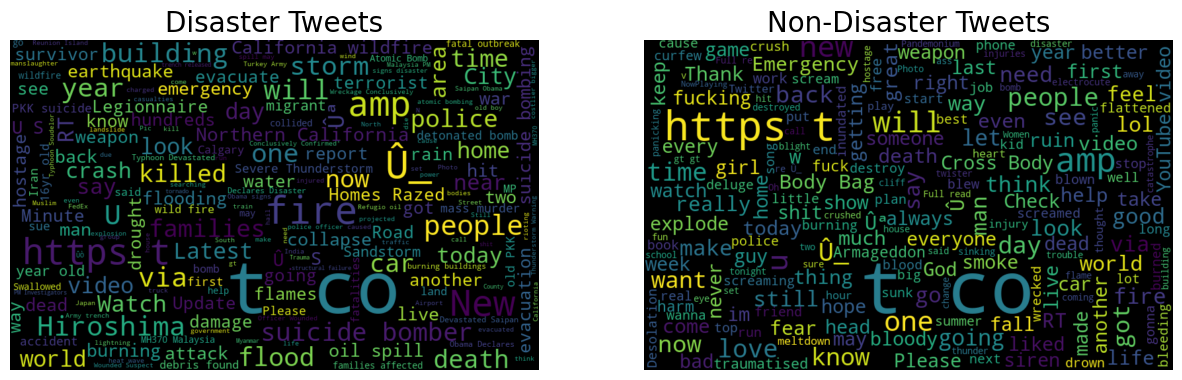

In [5]:
from wordcloud import WordCloud

# Combine all disaster and non-disaster tweets
disaster_tweets = ' '.join(data[data['target'] == 1]['text'])
non_disaster_tweets = ' '.join(data[data['target'] == 0]['text'])

# Generate word clouds
wordcloud_disaster = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(disaster_tweets)
wordcloud_non_disaster = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(non_disaster_tweets)

# Plot word clouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
ax1.imshow(wordcloud_disaster, interpolation="bilinear")
ax1.set_title('Disaster Tweets', fontsize=20)
ax1.axis('off')

ax2.imshow(wordcloud_non_disaster, interpolation="bilinear")
ax2.set_title('Non-Disaster Tweets', fontsize=20)
ax2.axis('off')

plt.show()


**Disaster Tweets:** Words like 'fire', 'news', 'suicide', 'police', 'disaster', 'bomb', 'california', 'hiroshima', 'killed', 'storm', 'crash', etc. are frequently used. These words often signify a real-life disaster.

**Non-Disaster Tweets:** Frequent words include 'new', 'like', 'body', 'love', 'will', 'people', 'burning', 'one', 'time', etc. These words seem to be more general and less indicative of a disaster.

# ML-Model Setup:

**Text Preprocessing:** This involves cleaning the text data by removing unnecessary characters, converting all text to lower case, removing stopwords, and stemming or lemmatizing the words.

**Feature Extraction:** Convert the cleaned text data into a numerical format that a machine learning model can understand. We can use methods like Bag of Words, TF-IDF, or even more advanced techniques like word embeddings.

**Model Training:** Train a machine learning model on the preprocessed data. We can start with a simple model like logistic regression and then experiment with more complex models if necessary.

**Evaluation:** Evaluate the performance of the model using the F1 score as the metric.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import nltk

**Here are some of the ways to transform text data into a format that can be used with logistic regression:**

**Bag of Words:** This method transforms the text into a 'bag' (set) of its words, disregarding grammar and word order but keeping the multiplicity of the words. Each document is represented as a vector in a multidimensional feature space, where each dimension represents a unique word in the corpus vocabulary.

**TF-IDF (Term Frequency-Inverse Document Frequency):** This method is an improvement over the Bag of Words approach. It not only counts the occurrence of a word in a given document (Term Frequency), but it also takes into account how often the word appears across all documents (Inverse Document Frequency). This helps to give higher weight to words that are more specific to a document.

**Word Embeddings:** This is an advanced method that represents words in a high-dimensional space where the location and distance between words indicate their semantic similarity. Word2Vec and GloVe are popular word embedding methods.

In [7]:
# Pre-defined list of English stopwords
stop_words = {
    "ourselves", "hers", "between", "yourself", "but", 
    "again", "there", "about", "once", "during", "out", 
    "very", "having", "with", "they", "own", "an", "be", 
    "some", "for", "do", "its", "yours", "such", "into", 
    "of", "most", "itself", "other", "off", "is", "s", "am", 
    "or", "who", "as", "from", "him", "each", "the", "themselves", 
    "until", "below", "are", "we", "these", "your", "his", "through", 
    "don", "nor", "me", "were", "her", "more", "himself", "this", 
    "down", "should", "our", "their", "while", "above", "both", "up", 
    "to", "ours", "had", "she", "all", "no", "when", "at", "any", 
    "before", "them", "same", "and", "been", "have", "in", "will", 
    "on", "does", "yourselves", "then", "that", "because", "what", 
    "over", "why", "so", "can", "did", "not", "now", "under", "he", 
    "you", "herself", "has", "just", "where", "too", "only", "myself", 
    "which", "those", "i", "after", "few", "whom", "t", "being", "if", 
    "theirs", "my", "against", "a", "by", "doing", "it", "how", "further", 
    "was", "here", "than"
}

# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove punctuations and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lower case
    text = text.lower()
    # Remove stopwords and stem the words
    stemmer = PorterStemmer()
    text = ' '.join(stemmer.stem(word) for word in text.split() if word not in stop_words)
    return text

# Create a pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('clean_text', FunctionTransformer(lambda x: x.apply(clean_text))),
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Cross-validation with F1 score
scores = cross_val_score(pipeline, data['text'], data['target'], cv=5, scoring=make_scorer(f1_score))

scores.mean()


0.6044503440154803

The model achieved an average F1 score of approximately 0.604 in cross-validation. This score can be interpreted as a measure of the model's accuracy in terms of both precision and recall.

F1 score is the harmonic mean of precision and recall and it ranges from 0 (worst) to 1 (best). An F1 score of 0.604 suggests that the model has a moderate performance in predicting whether a given tweet is about a real disaster or not.

**Improving the model can be approached in several ways:**

* **Feature Engineering:** We can create additional features from the text data, such as the length of the tweet, the number of words, the number of unique words, the number of hashtags, and so on.

* **Hyperparameter Tuning:** We can tune the hyperparameters of the logistic regression model and the TF-IDF vectorizer to optimize performance.

* **Advanced Models:** We can experiment with more complex models like Support Vector Machines, Naive Bayes, or even deep learning models like Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs). However, please note that this environment might not have the computational resources needed for some of these more complex models.

* **Ensemble Methods:** We can also try ensemble methods like Random Forests or Gradient Boosting, which combine the predictions of multiple models to make a final prediction.

* **Advanced NLP Techniques:** We could employ more advanced NLP techniques like word embeddings (Word2Vec, GloVe) or transformer models (BERT, GPT-2) for feature extraction. However, as with deep learning models, these techniques can be computationally intensive.

Let's start by tuning the hyperparameters of our current pipeline using Grid Search. We'll tune the regularization parameter C of the logistic regression model and the ngram_range parameter of the TF-IDF vectorizer. This could help us achieve a better balance between bias and variance, which might result in a higher F1 score.

In [8]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=make_scorer(f1_score), verbose=2)
grid_search.fit(data['text'], data['target'])

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............clf__C=0.1, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END ..............clf__C=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END ..............clf__C=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END ..............clf__C=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END ..............clf__C=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END ..............clf__C=0.1, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END ..............clf__C=0.1, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END ..............clf__C=0.1, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END ..............clf__C=0.1, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END ..............clf__C=0.1, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END ................clf__C=1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END ................clf__C=1, tfidf__ngram_r

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............clf__C=10, tfidf__ngram_range=(1, 2); total time=   1.3s
[CV] END ...............clf__C=10, tfidf__ngram_range=(1, 2); total time=   1.3s


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............clf__C=10, tfidf__ngram_range=(1, 2); total time=   1.3s


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


({'clf__C': 10, 'tfidf__ngram_range': (1, 2)}, 0.6398499144939562)

**No score improvement. Lets focus on other areas:**

**Feature engineering** can often lead to significant improvements in model performance. Here are a few features we can create from the text data:

* **Length of the tweet:** Longer tweets might be more likely to be about real disasters because they provide more information.

* **Number of words:** Similar to the length of the tweet, the number of words could be informative. A higher word count might indicate a more complex sentence structure, which could be more characteristic of disaster tweets.

* **Number of unique words:** This could be an indicator of the diversity of the language used in the tweet. Real disaster tweets might use a wider range of vocabulary to describe the event.

* **Number of hashtags:** Hashtags are often used in social media to highlight the main themes of the post. The number of hashtags could be a useful feature.

* **Number of mentions:** The number of mentions (@) could be indicative of the communication between users, which might be more common in non-disaster tweets.

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

# Function to count hashtags and mentions
def count_hashtags_mentions(text):
    hashtags = text.count('#')
    mentions = text.count('@')
    return hashtags, mentions

# Create additional features
data['length'] = data['text'].apply(len)
data['num_words'] = data['text'].apply(lambda x: len(x.split()))
data['num_unique_words'] = data['text'].apply(lambda x: len(set(x.split())))
data['num_hashtags'], data['num_mentions'] = zip(*data['text'].apply(count_hashtags_mentions))

# Define the features and target
features = data[['text', 'length', 'num_words', 'num_unique_words', 'num_hashtags', 'num_mentions']]
target = data['target']

# Create a pipeline for the numerical data
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Create a pipeline for the text data
text_pipeline = Pipeline([
    ('clean_text', FunctionTransformer(lambda x: x.apply(clean_text))),
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2)))
])

# Combine the numerical and text pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, ['length', 'num_words', 'num_unique_words', 'num_hashtags', 'num_mentions']),
    ('text', text_pipeline, 'text')
])

# Create a pipeline with the preprocessor and the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(C=1))
])

# Cross-validation with F1 score
scores = cross_val_score(pipeline, features, target, cv=5, scoring=make_scorer(f1_score))

scores.mean()


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

0.6454250298125882

The model achieved an average F1 score of approximately 0.645 in cross-validation after adding the engineered features. This is an improvement over the previous score of 0.604, indicating that the additional features have helped the model to better distinguish between disaster and non-disaster tweets.

**Predicting on test set:**

In [11]:
# Load the test data
test_data = pd.read_csv('test.csv')

# Create the same features for the test data
test_data['length'] = test_data['text'].apply(len)
test_data['num_words'] = test_data['text'].apply(lambda x: len(x.split()))
test_data['num_unique_words'] = test_data['text'].apply(lambda x: len(set(x.split())))
test_data['num_hashtags'], test_data['num_mentions'] = zip(*test_data['text'].apply(count_hashtags_mentions))

# Define the test features
test_features = test_data[['text', 'length', 'num_words', 'num_unique_words', 'num_hashtags', 'num_mentions']]

# Fit the model on the full training data
pipeline.fit(features, target)

# Make predictions on the test data
test_predictions = pipeline.predict(test_features)

test_predictions


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [12]:
# Create a DataFrame with the ID and predictions
output = pd.DataFrame({
    'id': test_data['id'],
    'target': test_predictions
})

# Save the DataFrame to a CSV file
output.to_csv('predictions.csv', index=False)


**Sore: 0.79**

In [14]:
from sklearn.linear_model import SGDClassifier

# Update the pipeline with the SGDClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', SGDClassifier(loss='log', random_state=42))
])

# Fit the model on the full training data
pipeline.fit(features, target)

# Make predictions on the test data
test_predictions = pipeline.predict(test_features)

test_predictions


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [15]:
# Create a DataFrame with the ID and predictions
output_v2 = pd.DataFrame({
    'id': test_data['id'],
    'target': test_predictions
})

# Save the DataFrame to a CSV file
output_v2.to_csv('predictions_v02.csv', index=False)


**Sore: 0.79**